1
1/1 [==============================] - 2s 2s/step
139830.90625
2
1/1 [==============================] - 0s 244ms/step
146869.0


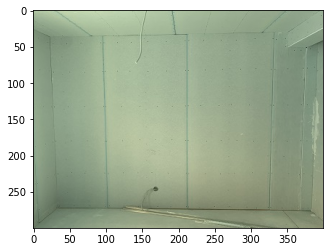

In [3]:
import sqlite3
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from keras.models import load_model
from keras.utils import load_img
from keras.utils import img_to_array

import cv2

# idee: diesem python programm wird eine projekt id vom Frontend übergeben, das programm nimmt daraufhin die datenbank zur hand (nützliches tool
# zum öffnen der Datenbank: https://sqlitebrowser.org/dl/, python Methodiken für SQL: https://www.sqlitetutorial.net/sqlite-python/) öffnet die Bilddatentabelle und entnimmt 
# dieser welche Bilder im Ordner "material images" die projekt id haben, öffnet diese
# und ermittelt den Wert. Diser wird wieder in die Bilddatentabelle eingetragen und kann so vom Frontend weiterverwendet werden


# load model, insert in the folder first, check model under: https://netron.app/
interpreter = tf.keras.models.load_model('material_model.h5')

# load database
try:
    db = sqlite3.connect('assets/spachtlerData.db')
except sqlite3.Error as e:
    print(e)

projectId = 1
cur = db.cursor()

# array aus Bilddateibezeichnungen
cur.execute("SELECT id FROM images WHERE projectId="+ str(projectId))
array = cur.fetchall()
for element in array:
    id = element[0]
    print(id)

    # get the image name aus array
    pathEl = str(id)
    img = cv2.imread('assets/material_images/'+ pathEl +'.jpg')

    # dimensions = img.shape
 
    # # height, width, number of channels in image
    # height = img.shape[0]
    # width = img.shape[1]
    # channels = img.shape[2]
 
    # print('Image Dimension    : ',dimensions)
    # print('Image Height       : ',height)
    # print('Image Width        : ',width)
    # print('Number of Channels : ',channels)
    plt.imshow(img)

    # print(img.shape)
    img = np.array(img, dtype="float32")
    img = img[np.newaxis,:,:,:]

    # predict from image
    prediction = interpreter.predict(img)

    floatVal = float(prediction[0][0])

    outcomeAsString = str(floatVal)

    print(outcomeAsString)

    cur.execute("UPDATE images SET aiValue="+ outcomeAsString +" WHERE id="+ pathEl)

    db.commit()